# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
# # some_file.py
# import sys
# # insert at 1, 0 is the script path (or '' in REPL)
# sys.path.insert(1, '/path/to/application/app/folder')
# import file
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
temp = []
humidity = []
cloud = []
wind = []
clean_city = []
lat = []
lon =[]
country = []
date = []
for city in cities:
    response = requests.get(url + city).json()
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        clean_city.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing... City: {city} City Number: {response['id']}")
    except:
        print(f"{city} is not available")
        
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Processing... City: bluff City Number: 2206939
Processing... City: punta arenas City Number: 3874787
Processing... City: marsaxlokk City Number: 2562247
Processing... City: khatanga City Number: 2022572
Processing... City: chifeng City Number: 2038067
taolanaro is not available
Processing... City: shelburne City Number: 6145890
Processing... City: cherskiy City Number: 2126199
taburao is not available
Processing... City: busselton City Number: 2075265
Processing... City: victoria City Number: 1819729
Processing... City: emerald City Number: 2167426
Processing... City: port blair City Number: 1259385
Processing... City: yar-sale City Number: 1486321
Processing... City: huicheng City Number: 1806881
aflu is not available
Processing... City: praia City Number: 3374333
grand river south east is not available
Processing... City: aksarka City Number: 1512019
Processing... City: albany City Number: 5106841
Processing... City: nampula City Number: 1033356
Processing... City: rikitea City Numbe

Processing... City: saint-augustin City Number: 6137462
Processing... City: jamestown City Number: 5122534
Processing... City: lata City Number: 2738381
Processing... City: dikson City Number: 1507390
Processing... City: waiuku City Number: 2179756
Processing... City: kandrian City Number: 2094746
Processing... City: turukhansk City Number: 1488903
Processing... City: mackay City Number: 2159220
Processing... City: belaya gora City Number: 2126785
Processing... City: clyde river City Number: 5924351
Processing... City: moron City Number: 3430545
Processing... City: xichang City Number: 1789647
Processing... City: longyearbyen City Number: 2729907
Processing... City: talnakh City Number: 1490256
rungata is not available
Processing... City: acapulco City Number: 3533462
Processing... City: khandyga City Number: 2022773
Processing... City: salalah City Number: 286621
Processing... City: sainte-maxime City Number: 6445060
Processing... City: burnie City Number: 2173125
Processing... City: 

Processing... City: luderitz City Number: 3355672
Processing... City: korla City Number: 1529376
Processing... City: obihiro City Number: 2128815
Processing... City: lerwick City Number: 2644605
Processing... City: atambua City Number: 1651103
Processing... City: komsomolskiy City Number: 1513491
saleaula is not available
Processing... City: kargopol City Number: 552465
Processing... City: nome City Number: 5870133
Processing... City: evensk City Number: 2125693
Processing... City: saint-michel-des-saints City Number: 6138802
Processing... City: fort nelson City Number: 5955902
Processing... City: jiayuguan City Number: 1280957
Processing... City: la romana City Number: 3500957
Processing... City: humberto de campos City Number: 3398428
Processing... City: codrington City Number: 2171099
Processing... City: twentynine palms City Number: 5404198
Processing... City: kachiry City Number: 1523662
Processing... City: labytnangi City Number: 1500933
Processing... City: megion City Number: 14

Processing... City: concepcion del oro City Number: 4013039
Processing... City: sulphur City Number: 4342816
Processing... City: odessa City Number: 698740
Processing... City: kulhudhuffushi City Number: 1337613
Processing... City: mezen City Number: 527321
Processing... City: la ronge City Number: 6050066
Processing... City: upata City Number: 3625710
Processing... City: mlonggo City Number: 1635164
Processing... City: roma City Number: 5134295
Processing... City: port hardy City Number: 6111862
Processing... City: lebanon City Number: 4636045
Processing... City: viedma City Number: 3832899
Processing... City: merrill City Number: 5262680
Processing... City: karia City Number: 2324767
Processing... City: zhigansk City Number: 2012530
tumannyy is not available
Processing... City: mildura City Number: 2157698
Processing... City: kaspiyskiy City Number: 551846
Processing... City: sao gabriel da cachoeira City Number: 3662342
Processing... City: beloha City Number: 1067565
Processing... C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
city_df = pd.DataFrame({"City":clean_city,"Lat":lat,"Lon":lon,"Max Temp":temp,"Humidity":humidity,"Cloudiness":cloud,
                       "Wind Speed":wind,"Country":country,"Date":date})
city_df.to_csv('city_data.csv')
city_df.count()

City          575
Lat           575
Lon           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [16]:
city_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,39.00,83,96,3.00,NZ,1595467851
1,punta arenas,-53.15,-70.92,26.60,92,57,4.70,CL,1595467742
2,marsaxlokk,35.84,14.54,77.00,64,0,6.93,MT,1595467853
3,khatanga,71.97,102.50,45.64,82,100,17.56,RU,1595467853
4,chifeng,42.27,118.96,81.23,40,0,6.02,CN,1595467854
...,...,...,...,...,...,...,...,...,...
570,kupang,-10.17,123.58,82.40,51,20,18.34,ID,1595467662
571,solnechnyy,50.72,136.63,64.00,84,91,5.59,RU,1595467947
572,amursk,50.23,136.90,70.70,75,95,11.16,RU,1595467947
573,seoul,37.57,126.98,73.40,88,1,4.70,KR,1595467901


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%. 

In [20]:
city_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.414052,19.446139,69.184783,71.646957,52.547826,7.585026,1.595468e+09
std,32.954577,91.533653,12.808344,18.445764,40.089978,5.126229,7.521353e+01
min,-54.800000,-179.170000,26.600000,3.000000,0.000000,0.160000,1.595467e+09
25%,-7.215000,-62.700000,60.800000,62.000000,7.000000,3.690000,1.595468e+09
50%,25.090000,21.160000,70.290000,75.000000,60.000000,6.620000,1.595468e+09
75%,48.205000,105.155000,79.540000,85.000000,92.500000,10.035000,1.595468e+09
max,78.220000,179.320000,101.340000,100.000000,100.000000,28.860000,1.595468e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [26]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


144

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

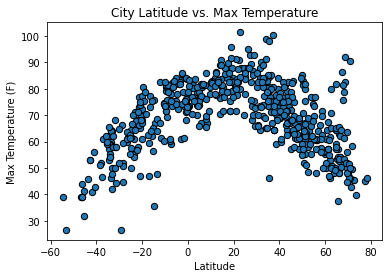

In [51]:
city_df.plot('Lat','Max Temp', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

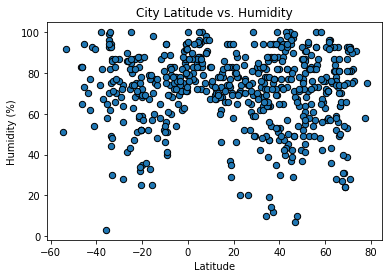

In [52]:
city_df.plot('Lat','Humidity', kind='scatter',edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

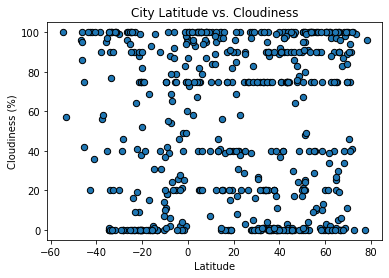

In [53]:
city_df.plot('Lat','Cloudiness', kind='scatter',edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

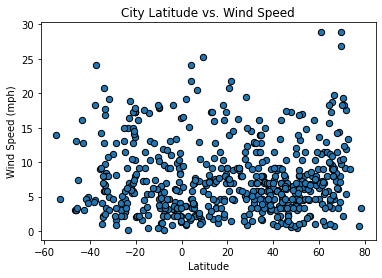

In [54]:
city_df.plot('Lat','Wind Speed', kind='scatter',edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [78]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg_line(x_axis, y_axis,x,y):
    print(f"The r-squared is {(st.pearsonr(x_axis,y_axis)[0])**2}")
    m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
    m_fit = m_slope * x_axis + m_int
    plt.plot(x_axis,m_fit,"r-")
    line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

In [79]:
# Create Northern and Southern Hemisphere DataFrames
north= city_df['Lat']>=0
north_df = city_df[north]

south= city_df['Lat']<0
south_df = city_df[south]
south_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,39.00,83,96,3.00,NZ,1595467851
1,punta arenas,-53.15,-70.92,26.60,92,57,4.70,CL,1595467742
7,busselton,-33.65,115.33,60.01,49,77,16.91,AU,1595467838
9,emerald,-23.53,148.17,60.80,87,90,14.99,AU,1595467814
16,nampula,-15.12,39.27,56.50,98,2,5.41,MZ,1595467871
...,...,...,...,...,...,...,...,...,...
565,nhulunbuy,-12.23,136.77,82.40,58,40,12.75,AU,1595467946
566,mazagao,-0.12,-51.29,78.80,100,75,3.36,BR,1595467946
567,oliveira dos brejinhos,-12.32,-42.90,66.96,65,90,6.31,BR,1595467947
568,rocha,-34.48,-54.33,65.62,94,100,8.03,UY,1595467947


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.43766337509640285


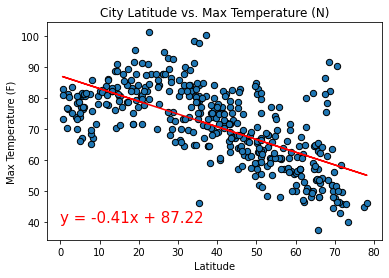

In [80]:
north_df.plot('Lat','Max Temp', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (N)")
reg_line(north_df['Lat'],north_df['Max Temp'],0,40)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5903932692205858


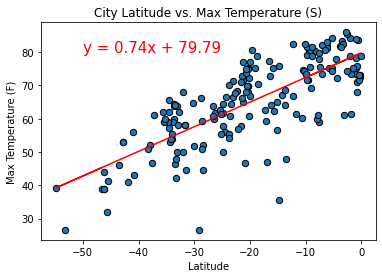

In [83]:
south_df.plot('Lat','Max Temp', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (S)")
reg_line(south_df['Lat'],south_df['Max Temp'],-50,80)
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.023514370214196542


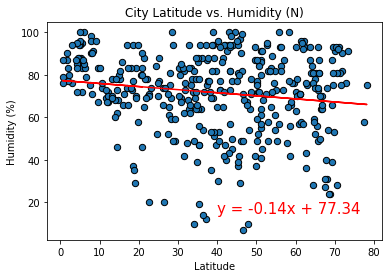

In [85]:
north_df.plot('Lat','Humidity', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (N)")
reg_line(north_df['Lat'],north_df['Humidity'],40,15)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0004420314649397029


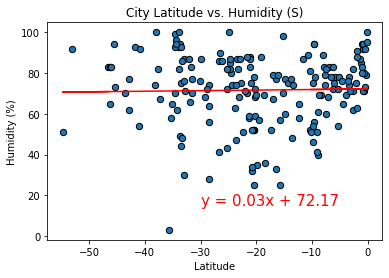

In [88]:
south_df.plot('Lat','Humidity', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (S)")
reg_line(south_df['Lat'],south_df['Humidity'],-30,15)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.005665987193405731


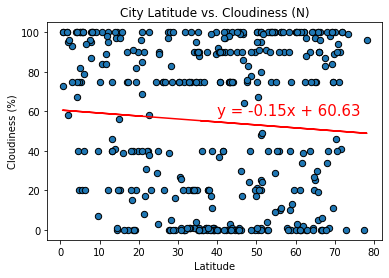

In [91]:
north_df.plot('Lat','Cloudiness', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (N)")
reg_line(north_df['Lat'],north_df['Cloudiness'],40,58)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.01876148678890697


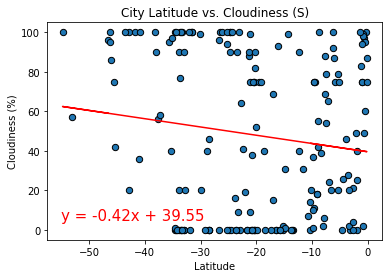

In [98]:
south_df.plot('Lat','Cloudiness', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (S)")
reg_line(south_df['Lat'],south_df['Cloudiness'],-55,5)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.00485249156678333


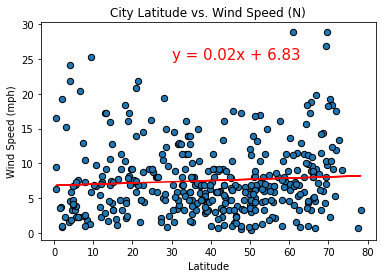

In [100]:
north_df.plot('Lat','Wind Speed', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (N)")
reg_line(north_df['Lat'],north_df['Wind Speed'],30,25)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.010409433849981255


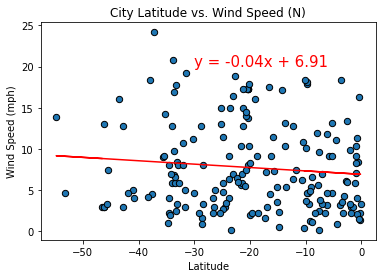

In [102]:
south_df.plot('Lat','Wind Speed', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (N)")
reg_line(south_df['Lat'],south_df['Wind Speed'],-30,20)
plt.show()